In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#1.1
data = pd.read_csv('./data.csv')

In [3]:
#1.2
data.shape

(1216553, 13)

In [4]:
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [6]:
data.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [7]:
#1.3
data = data[data["city"]=="서울특별시"]
data.reset_index(drop=True, inplace=True)

In [8]:
#1,4
data.rename(columns={'transaction_real_price':'price'}, inplace=True)

In [9]:
#1.5
data.drop(columns=['transaction_id', 'apartment_id','jibun','city'], axis=1, inplace=True)
data.shape

(742285, 9)

In [10]:
#1.6
data['transaction_year'] = data['transaction_year_month'].apply(lambda x: int(str(x)[:4]))
data['transaction_month'] = data['transaction_year_month'].apply(lambda x: int(str(x)[-2:]))
data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1


In [11]:
#1.7
data=data[data['transaction_year']>=2012]
data.reset_index(drop=True, inplace=True)
data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,1
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,1
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,1
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,1
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Price')

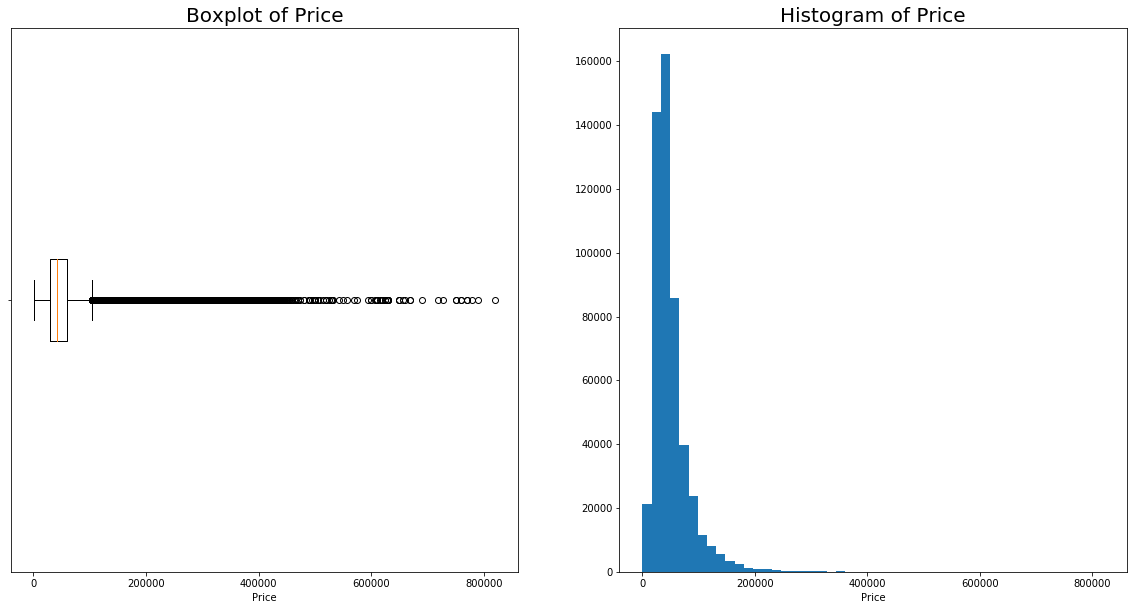

In [13]:
firstplot = plt.figure(figsize=(20,10))
axes1 = firstplot.add_subplot(1,2,1)
axes2 = firstplot.add_subplot(1,2,2)
axes1.boxplot(data['price'], vert=False)
axes1.set_title("Boxplot of Price", size=20)
axes1.set_yticklabels('')
axes1.set_xlabel('Price')
axes2.hist(data['price'],bins=50)
axes2.set_title("Histogram of Price", size=20)
axes2.set_xlabel('Price')

대부분의 가격이 낮은 가격에 몰려 있다. 하지만 높은 가격에 아웃라이어가 많이 존재한다. 

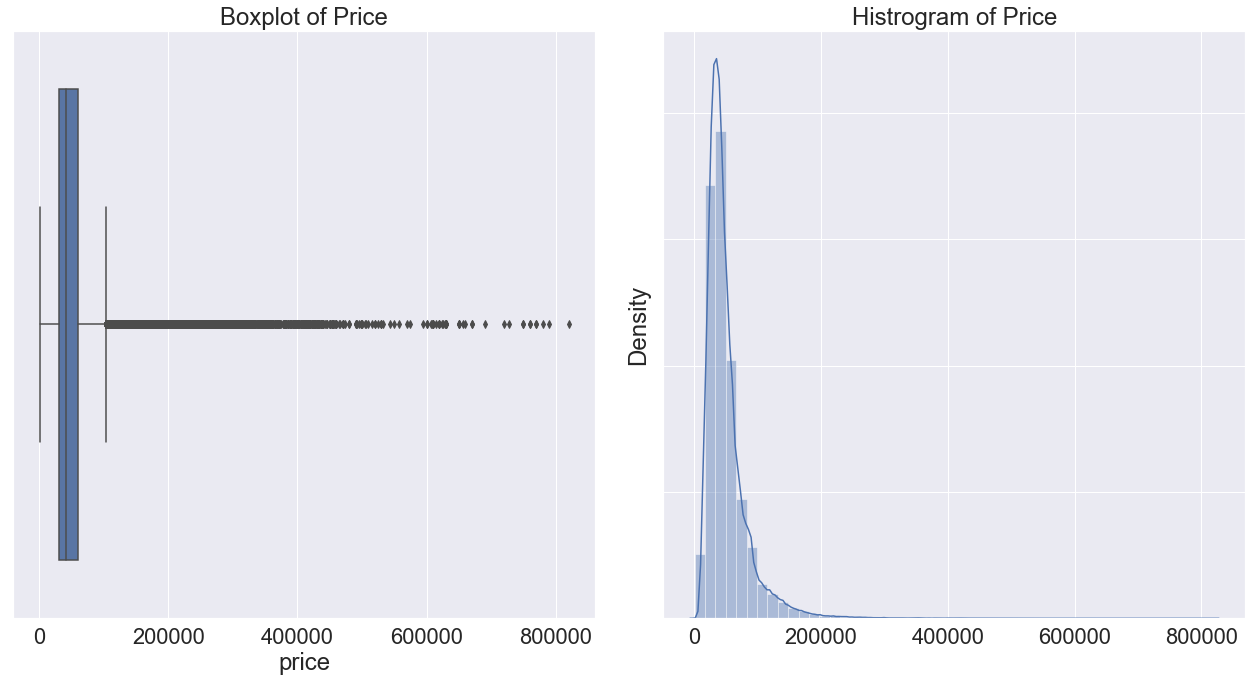

In [14]:
sns.set(font_scale = 2)
fig,axs = plt.subplots(ncols=2, figsize=(18,10))
sns.boxplot(x=data['price'],ax=axs[0])
axs[0].set_title("Boxplot of Price")
sns.distplot(x=data['price'])
axs[1].set_title("Histrogram of Price")
axs[1].set_yticklabels("")
fig.tight_layout()

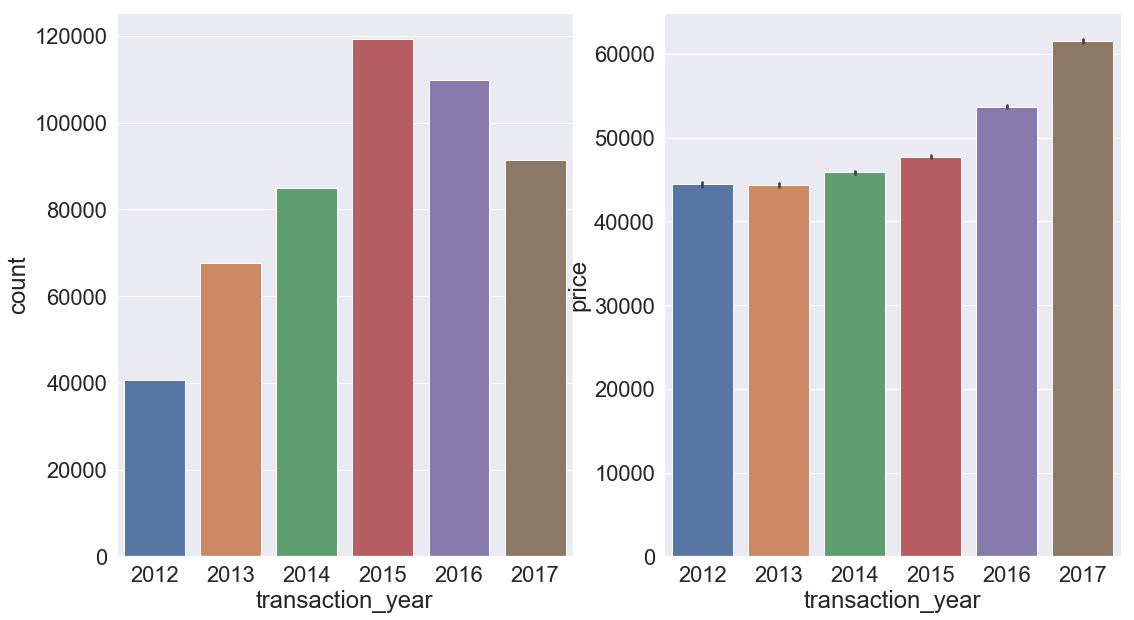

In [15]:
#2.2
fig, ax = plt.subplots(ncols=2, figsize=(18,10))
sns.countplot(x = data['transaction_year'], ax=ax[0])
sns.barplot(x = data['transaction_year'], y=data['price'], ax=ax[1])

해가 지날수록 비싼 가격에 거래되고 있음을 알 수 있다.

[]

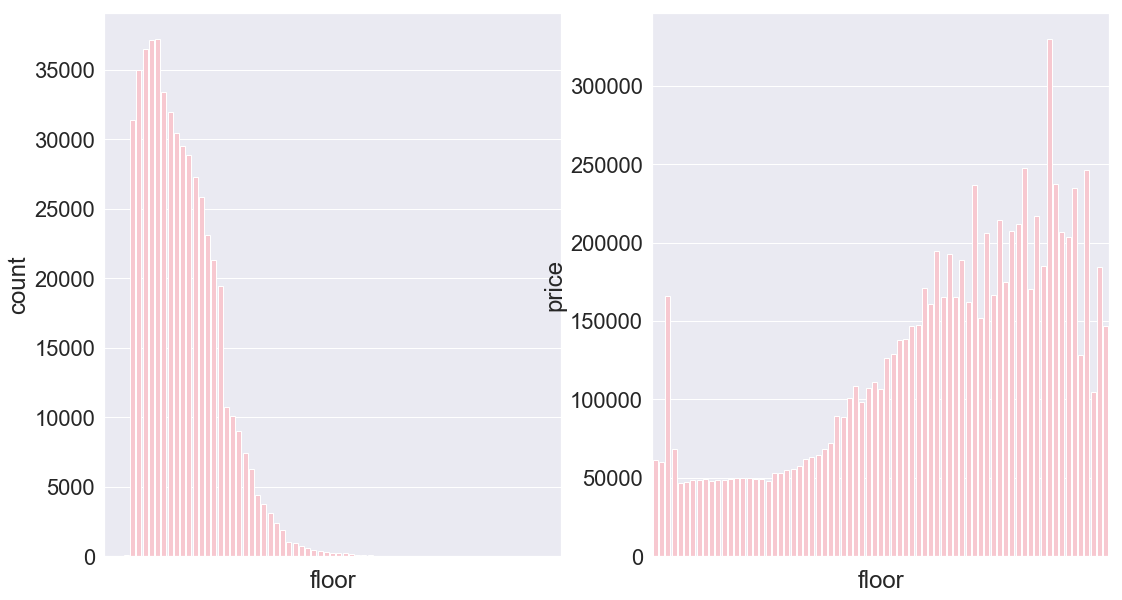

In [16]:
#2.3
fig ,ax = plt.subplots(ncols=2, figsize=(18,10))
sns.countplot(x = data['floor'], ax=ax[0], color='pink')
sns.barplot(x=data['floor'], y=data['price'], ax=ax[1], color='pink', ci=None)
ax[0].set_xticklabels('')
ax[1].set_xticklabels('')

고층일수록 가격이 높아지는 경향이 있다. 
고층일수록 거래가 잘 발생하지 않는 경향이 있다.

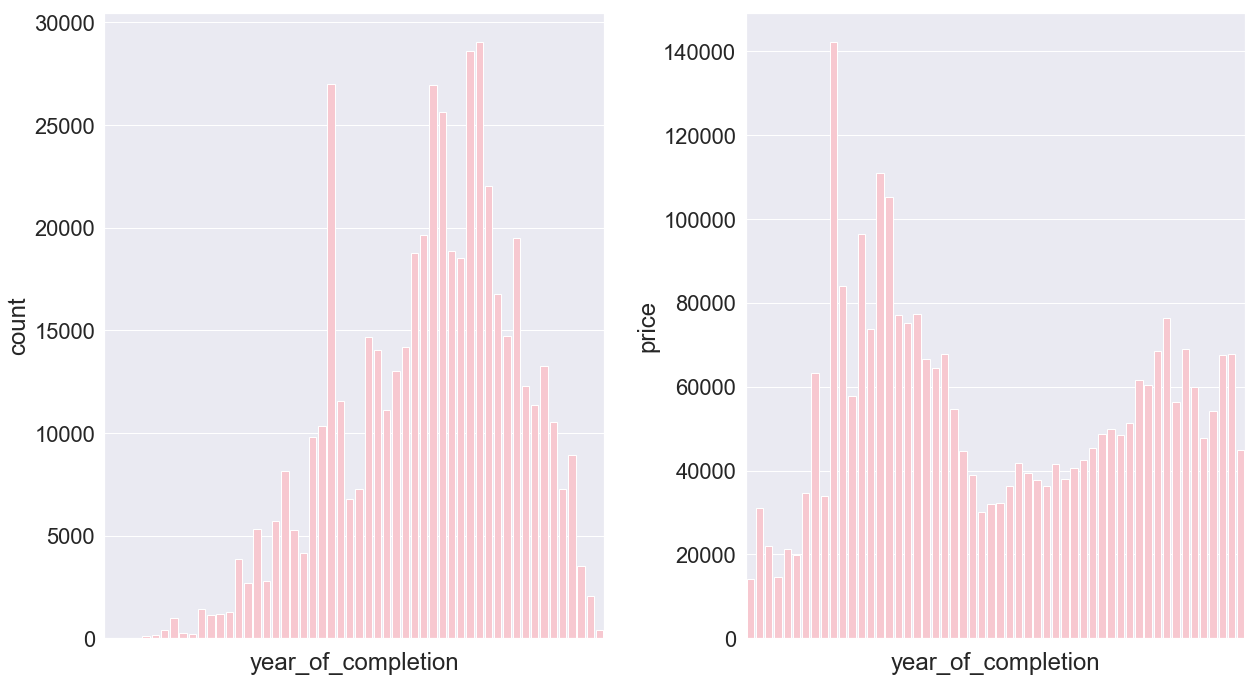

In [17]:
#2.4
fig, ax = plt.subplots(ncols=2, figsize=(18,10))
sns.countplot(x=data["year_of_completion"], ax=ax[0], color='pink')
sns.barplot(x=data["year_of_completion"], y=data["price"], ax=ax[1], color='pink', ci=None)
for i in range(2):
    ax[i].set_xticklabels('')
fig.tight_layout()

최근의 아파트들이라고 꼭 비싸기보다는 오히려 과거에 완공된 아파트의 가격이 더 비싼 경우가 있다.
거래 횟수는 최근에 완공된 아파트가 많은 경향이 있다.

In [18]:
#3.1
data["until_trans"] = data["transaction_year"]-data["year_of_completion"]

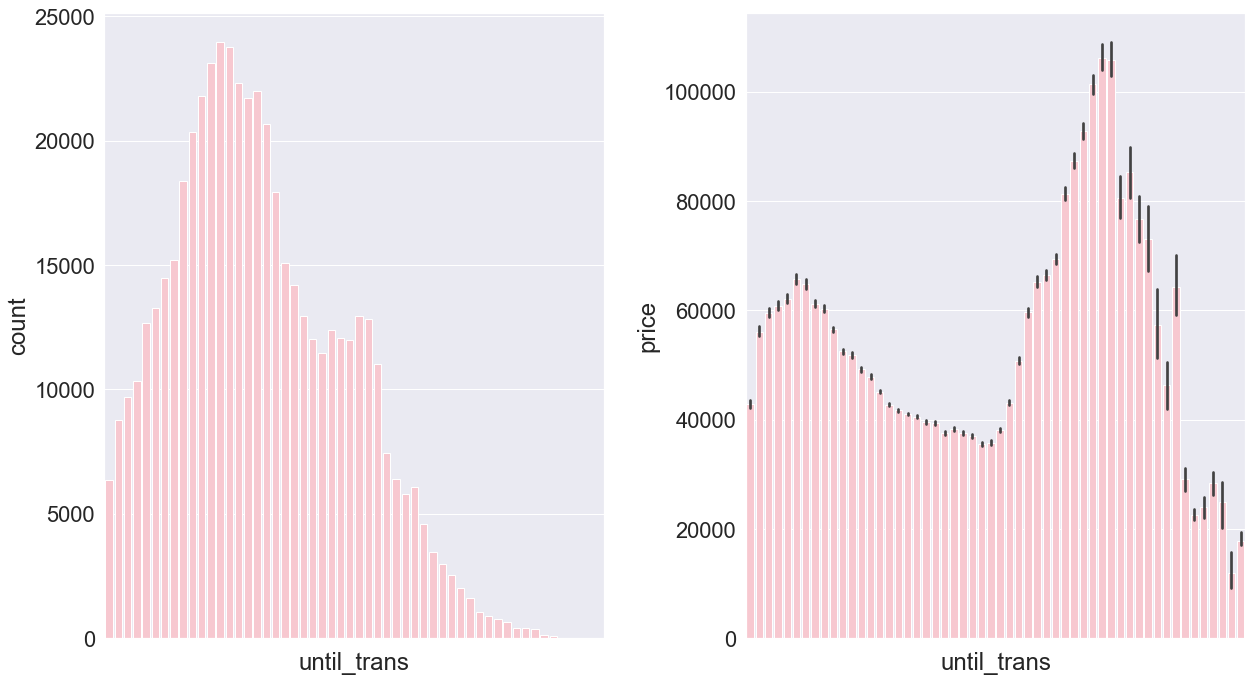

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(18,10))
sns.countplot(x=data["until_trans"], ax=ax[0], color='pink')
sns.barplot(x=data["until_trans"], y=data["price"], ax=ax[1], color='pink')
for i in range(2):
    ax[i].set_xticklabels('')
fig.tight_layout()

오래된 아파트나 새 아파트의 경우 거래가 잘 이루어지지 않으며, 
약간 오래된 아파트의 가격이 높게 형성되어 있다.
아주 오래된 아파트의 경우 낮은 가격에서 거래된다.


In [20]:
#3.2
data['transaction_date']=np.where(data['transaction_date'] =='1~10',0,
                                  np.where(data['transaction_date']=='11~20',1,2))

In [21]:
#3.3
data['transaction_month_date'] = 3*data['transaction_month'] + data['transaction_date']
data[['transaction_month_date', 'transaction_month', 'transaction_date']] 

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


In [22]:
#3.4
import math
year_in_md = 35-3+1
data['sin_date'] = np.sin(2*np.pi*data['transaction_month_date']/year_in_md)
data['cos_date'] = np.cos(2*np.pi*data['transaction_month_date']/year_in_md)

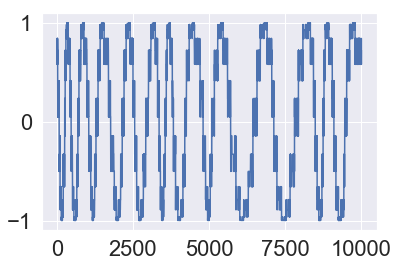

In [23]:
data['cos_date'].iloc[1:10000].plot()

숨겨져있는 데이터의 패턴을 찾을 수 있다...고 하는데 직관적으로 이해가 되지는 않네욤...


In [24]:
#4.1
apt = data['apt']
import re
apt = apt.apply(lambda x: ''.join(re.compile('[가-힣]+').findall(x)))
apt.head()

0    광화문풍림스페이스본
1    광화문풍림스페이스본
2    광화문풍림스페이스본
3      로얄팰리스스위트
4      로얄팰리스스위트
Name: apt, dtype: object

In [25]:
#4.2
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5)
X = vectorizer.fit_transform(apt)

In [26]:
#4.3
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(min_df=5)
X1 = vectorizer1.fit_transform(apt)

#4.4

연산 량이 커지는 문제가 발생..?


In [27]:
#5
data = data.drop(columns=['addr_kr'])

In [28]:
#5.1
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
onehot = OneHotEncoder()
label_enc = LabelEncoder()
apt_label = label_enc.fit_transform(apt)
apt_label = np.reshape(apt_label, (-1,1))
apt_onehot = onehot.fit_transform(apt_label)

In [29]:
onehot = OneHotEncoder()
label_enc = LabelEncoder()
dong_label = label_enc.fit_transform(data['dong'])
dong_label = np.reshape(apt_label, (-1,1))
dong_onehot = onehot.fit_transform(dong_label)

In [30]:
dong_onehot
#차원이 너무 커서 적절하지 않다.

<513528x5082 sparse matrix of type '<class 'numpy.float64'>'
	with 513528 stored elements in Compressed Sparse Row format>

In [31]:
#5.2
le = LabelEncoder()
data['transaction_year'] = le.fit_transform(data['transaction_year'])

In [32]:
data.head()

,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans,transaction_month_date,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,0,1,4,3,0.540641,0.841254
1,사직동,광화문풍림스페이스본(9-0),108.55,2008,201201,1,11,100500,0,1,4,4,0.690079,0.723734
2,사직동,광화문풍림스페이스본(9-0),94.51,2008,201201,1,1,65800,0,1,4,4,0.690079,0.723734
3,수송동,로얄팰리스스위트,42.87,2005,201201,0,8,30500,0,1,7,3,0.540641,0.841254
4,수송동,로얄팰리스스위트,39.67,2005,201201,2,15,30500,0,1,7,5,0.814576,0.580057


년도는 순서가 있기 때문에 적절하지 않다는 생각입니다

In [33]:
#5.3
le = LabelEncoder()
data['dong_label'] = le.fit_transform(data['dong'])
le = LabelEncoder()
data['apt_label'] = le.fit_transform(data['apt'])
data.head()

,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans,transaction_month_date,sin_date,cos_date,dong_label,apt_label
0,사직동,광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,0,1,4,3,0.540641,0.841254,130,805
1,사직동,광화문풍림스페이스본(9-0),108.55,2008,201201,1,11,100500,0,1,4,4,0.690079,0.723734,130,805
2,사직동,광화문풍림스페이스본(9-0),94.51,2008,201201,1,1,65800,0,1,4,4,0.690079,0.723734,130,805
3,수송동,로얄팰리스스위트,42.87,2005,201201,0,8,30500,0,1,7,3,0.540641,0.841254,164,2042
4,수송동,로얄팰리스스위트,39.67,2005,201201,2,15,30500,0,1,7,5,0.814576,0.580057,164,2042


적절한 방법일 수 있다. 다만 숫자의 크기에는 의미가 없는데 이를 간과할 수 있다

In [34]:
#5.3 mean encoding
data['apt_mean'] = np.mean(data['apt_label'])
data.head()

,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans,transaction_month_date,sin_date,cos_date,dong_label,apt_label,apt_mean
0,사직동,광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,0,1,4,3,0.540641,0.841254,130,805,3436.212927
1,사직동,광화문풍림스페이스본(9-0),108.55,2008,201201,1,11,100500,0,1,4,4,0.690079,0.723734,130,805,3436.212927
2,사직동,광화문풍림스페이스본(9-0),94.51,2008,201201,1,1,65800,0,1,4,4,0.690079,0.723734,130,805,3436.212927
3,수송동,로얄팰리스스위트,42.87,2005,201201,0,8,30500,0,1,7,3,0.540641,0.841254,164,2042,3436.212927
4,수송동,로얄팰리스스위트,39.67,2005,201201,2,15,30500,0,1,7,5,0.814576,0.580057,164,2042,3436.212927


범주를 정수로 바꾼 값의 평균을 구하는 것은 적절하지 않다고 생각한다

장점 그래도 중간 정도에 위치하는 범주를 알 수 있다?

단점 평균은 어느 한 범주를 의미하지는 않는다